### Finalised Preprocessing Steps
3 sets of augmentation: 

1. Original (Initial Set): Cropped to bbox + Random Horizontal, Random Rotation
2. No Crop: Original size images + Random Horizontal, Random Rotation
3. More Augmentation: Cropped to bbox + Random Horizontal, Random Rotation + Translate + Shear

In [ ]:
import pandas as pd
df_merged = pd.read_csv('meta_data.csv')

In [ ]:
'''original augmentation'''

import os
import pandas as pd
import torchvision.transforms as transforms
from PIL import Image
from tqdm import tqdm  # for progress bar
import torchvision.transforms.functional as F


output_dir = './augmented_images/'
os.makedirs(output_dir, exist_ok=True)

# Function to apply transformations including cropping to the bounding box
def apply_transforms(image, bbox, is_training):
    # Crop the image first
    image = F.crop(image, bbox['y'], bbox['x'], bbox['height'], bbox['width'])

    # Apply training or test transformations
    if is_training:
        image = train_transform(image)
    else:
        image = test_transform(image)

    return image


train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=45),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Update column for augmented image names
df_merged['augmented_image_name'] = None

for index, row in tqdm(df_merged.iterrows(), total=df_merged.shape[0]):
    image_path = f'./CUB_200_2011/images/{row["image_name"]}'
    image = Image.open(image_path)

    # Accessing individual bounding box attributes directly from the row
    bbox = {
        'x': row['bounding_x'],
        'y': row['bounding_y'],
        'width': row['bounding_width'],
        'height': row['bounding_height']
    }

    # Apply transformations including cropping
    transformed_image = apply_transforms(image, bbox, row['is_training_image'])

    # Convert the transformed tensor to PIL Image to save it (if not already a PIL Image)
    if not isinstance(transformed_image, Image.Image):
        transformed_image = F.to_pil_image(transformed_image)

    # Save augmented image
    augmented_image_path = os.path.join(output_dir, row["image_name"])
    os.makedirs(os.path.dirname(augmented_image_path), exist_ok=True)
    transformed_image.save(augmented_image_path)

    # Update DataFrame with new image path
    df_merged.at[index, 'augmented_image_name'] = augmented_image_path


In [ ]:
'''remove cropping'''

import os
import pandas as pd
import torchvision.transforms as transforms
from PIL import Image
from tqdm import tqdm  # for progress bar
import torchvision.transforms.functional as F


output_dir = './augmented_images_nocrop/'
os.makedirs(output_dir, exist_ok=True)

# Function to apply transformations including cropping to the bounding box
def apply_transforms(image, is_training):
    # Crop the image first
    # image = F.crop(image, bbox['y'], bbox['x'], bbox['height'], bbox['width'])

    # Apply training or test transformations
    if is_training:
        image = train_transform(image)
    else:
        image = test_transform(image)

    return image


train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=45),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Update column for augmented image names
df_merged['augmented_image_name'] = None

for index, row in tqdm(df_merged.iterrows(), total=df_merged.shape[0]):
    image_path = f'./CUB_200_2011/images/{row["image_name"]}'
    image = Image.open(image_path)

    # Accessing individual bounding box attributes directly from the row
    bbox = {
        'x': row['bounding_x'],
        'y': row['bounding_y'],
        'width': row['bounding_width'],
        'height': row['bounding_height']
    }

    # Apply transformations including cropping
    transformed_image = apply_transforms(image, row['is_training_image'])

    # Convert the transformed tensor to PIL Image to save it (if not already a PIL Image)
    if not isinstance(transformed_image, Image.Image):
        transformed_image = F.to_pil_image(transformed_image)

    # Save augmented image
    augmented_image_path = os.path.join(output_dir, row["image_name"])
    os.makedirs(os.path.dirname(augmented_image_path), exist_ok=True)
    transformed_image.save(augmented_image_path)

    # Update DataFrame with new image path
    df_merged.at[index, 'augmented_image_name'] = augmented_image_path


100%|██████████| 11788/11788 [04:12<00:00, 46.66it/s]


In [ ]:
'''another set of augmentation'''

import os
import pandas as pd
import torchvision.transforms as transforms
from PIL import Image
from tqdm import tqdm  # for progress bar
import torchvision.transforms.functional as F

output_dir = './augmented_images_more/'
os.makedirs(output_dir, exist_ok=True)

# Function to apply transformations including cropping to the bounding box
def apply_transforms(image, bbox, is_training):
    # Crop the image first
    image = F.crop(image, bbox['y'], bbox['x'], bbox['height'], bbox['width'])

    # Apply training or test transformations
    if is_training:
        image = train_transform(image)
    else:
        image = test_transform(image)

    return image


train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=45),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), shear=(-5, 5, -5, 5)),  # added augmentation
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Update column for augmented image names
df_merged['augmented_image_name'] = None

for index, row in tqdm(df_merged.iterrows(), total=df_merged.shape[0]):
    image_path = f'./CUB_200_2011/images/{row["image_name"]}'
    image = Image.open(image_path)

    # Accessing individual bounding box attributes directly from the row
    bbox = {
        'x': row['bounding_x'],
        'y': row['bounding_y'],
        'width': row['bounding_width'],
        'height': row['bounding_height']
    }

    # Apply transformations including cropping
    transformed_image = apply_transforms(image, bbox, row['is_training_image'])

    # Convert the transformed tensor to PIL Image to save it (if not already a PIL Image)
    if not isinstance(transformed_image, Image.Image):
        transformed_image = F.to_pil_image(transformed_image)

    # Save augmented image
    augmented_image_path = os.path.join(output_dir, row["image_name"])
    os.makedirs(os.path.dirname(augmented_image_path), exist_ok=True)
    transformed_image.save(augmented_image_path)

    # Update DataFrame with new image path
    df_merged.at[index, 'augmented_image_name'] = augmented_image_path


100%|██████████| 11788/11788 [1:16:53<00:00,  2.55it/s]


./augmented_images_nocrop/143.Caspian_Tern/Caspian_Tern_0109_145948.jpg
./augmented_images_nocrop/182.Yellow_Warbler/Yellow_Warbler_0087_176591.jpg
./augmented_images_nocrop/078.Gray_Kingbird/Gray_Kingbird_0062_795026.jpg
./augmented_images_nocrop/188.Pileated_Woodpecker/Pileated_Woodpecker_0089_179969.jpg
./augmented_images_nocrop/137.Cliff_Swallow/Cliff_Swallow_0108_133902.jpg


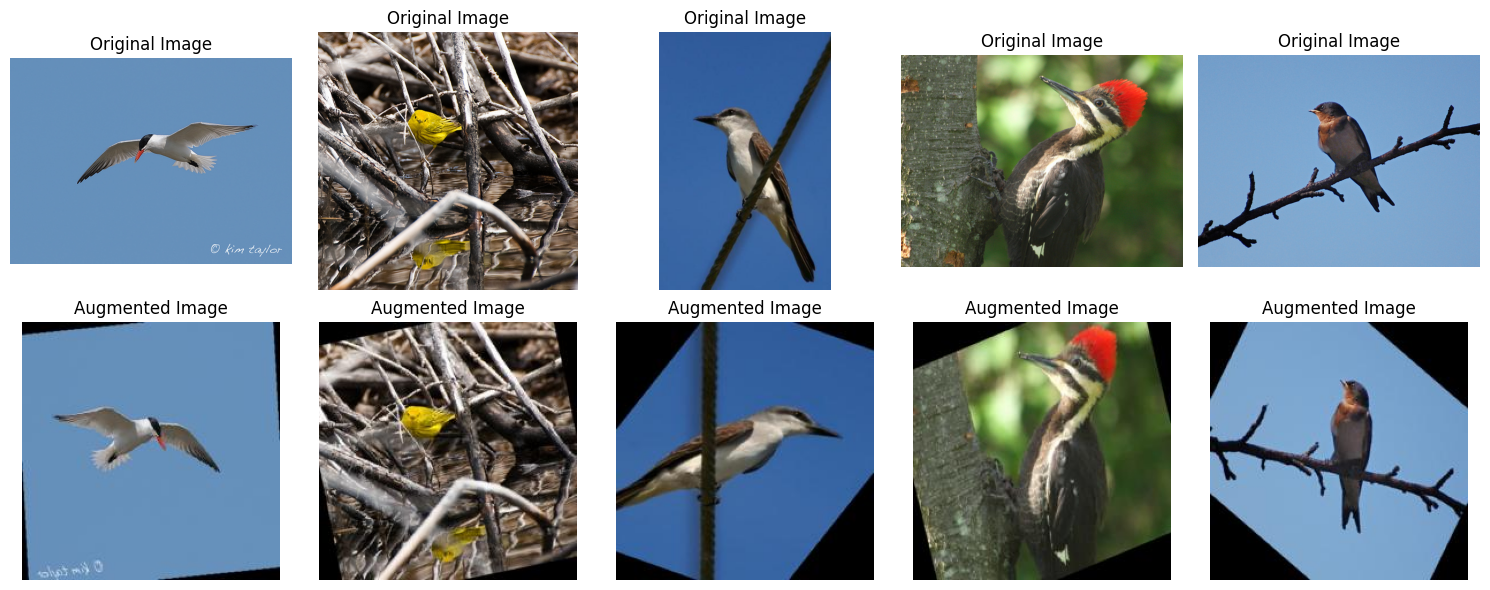

In [ ]:
import pandas as pd
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

meta_data = pd.read_csv('./meta_data.csv')
test_sample = meta_data[meta_data['is_training_image'] == 1].sample(5).reset_index()

n = len(test_sample)
fig, axs = plt.subplots(2, n, figsize=(n*3, 6))

for i, row in test_sample.iterrows():
    augment_path = './augmented_images_nocrop/' + row['image_name']
    print(augment_path)
    ori_path = './CUB_200_2011/images/' + row['image_name']

    # Load and plot original image
    ori_image = Image.open(ori_path)
    if n == 1:
        ax_ori = axs[0]
        ax_aug = axs[1]
    else:
        ax_ori = axs[0, i]
        ax_aug = axs[1, i]
    ax_ori.imshow(ori_image)
    ax_ori.axis('off')
    ax_ori.set_title('Original Image')

    # Load and plot augmented image
    augment_image = Image.open(augment_path)
    ax_aug.imshow(augment_image)
    ax_aug.axis('off')
    ax_aug.set_title('Augmented Image')

plt.tight_layout()
plt.show()